In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np 
from numpy import polyfit, polyval



In [2]:
data_aq = pd.read_csv("data/who_ambient_air_quality_database_version_2024_(v6.1)(Update 2024 (V6.csv")
data_aq = data_aq[data_aq["who_region"] == "4_Eur"]
data_aq

who_region iso3 country_name          city    year  \
0          4_Eur  ESP        Spain  A Coruna/ESP  2013.0   
1          4_Eur  ESP        Spain  A Coruna/ESP  2014.0   
2          4_Eur  ESP        Spain  A Coruna/ESP  2015.0   
3          4_Eur  ESP        Spain  A Coruna/ESP  2016.0   
4          4_Eur  ESP        Spain  A Coruna/ESP  2017.0   
...          ...  ...          ...           ...     ...   
40085      4_Eur  POL       Poland  Zyrardow/POL  2019.0   
40086      4_Eur  POL       Poland  Zyrardow/POL  2020.0   
40087      4_Eur  POL       Poland    Zywiec/POL  2010.0   
40088      4_Eur  POL       Poland    Zywiec/POL  2013.0   
40089      4_Eur  POL       Poland    Zywiec/POL  2014.0   

                                                 version  pm10_concentration  \
0      V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...              23.238   
1               V6.0  (2023), V6.0  (2023), V6.0  (2023)              27.476   
2      V6.0  (2023), V6.0  (2023), V6.0  (2023), V6.0...              25.515   
3      V6.0  (2023), V6.0  (2023), V6.0  (2023), V6.0...              23.057   
4      V6.0  (2023), V6.0  (2023), V6.0  (2023), V6.0...              26.849   
...                                                  ...                 ...   
40085                                       V6.0  (2023)              23.942   
40086                                       V6.0  (2023)              22.786   
40087              V4.0 (2018), V4.0 (2018), V4.0 (2018)              58.179   
40088              V4.0 (2018), V4.0 (2018), V4.0 (2018)              58.342   
40089                                       V6.0  (2023)              54.746   

       pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  \
0                  11.491             28.841          87.0          46.0   
1                  15.878             19.575          96.0          88.0   
2                  14.004             22.731          98.0          71.0   
3                  13.160             20.204          98.0          98.0   
4                  14.114             21.543          97.0          97.0   
...                   ...                ...           ...           ...   
40085              17.771                NaN          97.0          97.0   
40086              16.681                NaN          96.0          96.0   
40087                 NaN             28.907          82.0           NaN   
40088                 NaN             22.529          99.0           NaN   
40089                 NaN             22.912          96.0           NaN   

       no2_tempcov                  type_of_stations reference web_link  \
0             93.0            Urban, Urban, Suburban       NaN      NaN   
1             95.0            Urban, Urban, Suburban       NaN      NaN   
2             98.0  Urban, Urban, Suburban, Suburban       NaN      NaN   
3             98.0  Urban, Urban, Suburban, Suburban       NaN      NaN   
4             98.0  Urban, Urban, Suburban, Suburban       NaN      NaN   
...            ...                               ...       ...      ...   
40085          NaN                             Urban       NaN      NaN   
40086          NaN                             Urban       NaN      NaN   
40087         92.0                               NaN       NaN      NaN   
40088         95.0                             Urban       NaN      NaN   
40089         92.0                             Urban       NaN      NaN   

       population                         population_source   latitude  \
0        246146.0            manual, manual, manual, manual  43.367900   
1        247604.0                                       NaN  43.368033   
2        247604.0                                       NaN  43.370375   
3        247604.0                                       NaN  43.370375   
4        247604.0                                       NaN  43.370375   
...           ...                                       ...       

In [3]:
data_aq["city"].unique().size

4347

In [4]:
data_aq["year"].unique()

array([2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.,
       2010., 2012., 2011., 2022.])

In [5]:
data_aq["country_name"].unique().size

49

In [6]:
data_aq.columns

Index(['who_region', 'iso3', 'country_name', 'city', 'year', 'version',
       'pm10_concentration', 'pm25_concentration', 'no2_concentration',
       'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'type_of_stations',
       'reference', 'web_link', 'population', 'population_source', 'latitude',
       'longitude', 'who_ms'],
      dtype='object')

In [7]:
country_year_means = data_aq.groupby(["country_name", "year"])[['pm10_concentration', 'pm25_concentration', 'no2_concentration',
       'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']].mean()
country_year_means = country_year_means.reset_index()

In [8]:
country_year_means

country_name    year  \
0                                              Albania  2014.0   
1                                              Albania  2015.0   
2                                              Albania  2016.0   
3                                              Albania  2017.0   
4                                              Albania  2018.0   
..                                                 ...     ...   
400  United Kingdom of Great Britain and Northern I...  2018.0   
401  United Kingdom of Great Britain and Northern I...  2019.0   
402  United Kingdom of Great Britain and Northern I...  2020.0   
403                                         Uzbekistan  2018.0   
404                                         Uzbekistan  2019.0   

     pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  \
0             28.181800           12.910750          22.387800     57.800000   
1             25.467500           16.355750          18.094000     85.000000   
2             26.074250           16.847500          17.044200     78.000000   
3             28.301250           17.493750          17.376000     47.250000   
4             33.516500           16.712500          19.212750     20.000000   
..                  ...                 ...                ...           ...   
400           16.015115            9.631000          21.365400     87.431373   
401           15.547070            9.603864          21.005248     87.053571   
402           14.644339            8.031304          18.629457     96.053571   
403                 NaN           43.094000                NaN           NaN   
404                 NaN           41.962000                NaN           NaN   

     pm25_tempcov  no2_tempcov  
0       59.750000    41.800000  
1       79.000000    80.600000  
2       65.750000    86.800000  
3       42.750000    51.000000  
4       18.500000    13.750000  
..            ...          ...  
400     86.465517    93.170000  
401     90.758621    92.237624  
402     93.428571    94.010870  
403     53.000000          NaN  
404     81.000000          NaN  

[405 rows x 8 columns]

In [9]:
country_year_means["year"].min()

np.float64(2010.0)

In [10]:
data_ms = pd.read_csv("data/tran_hv_psmod_linear_2_0.csv")
data_ms

STRUCTURE              STRUCTURE_ID  \
0     dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   
1     dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   
2     dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   
3     dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   
4     dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   
...        ...                       ...   
4494  dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   
4495  dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   
4496  dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   
4497  dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   
4498  dataflow  ESTAT:TRAN_HV_PSMOD(1.0)   

                                 STRUCTURE_NAME freq Time frequency unit  \
0     Modal split of inland passenger transport    A         Annual   PC   
1     Modal split of inland passenger transport    A         Annual   PC   
2     Modal split of inland passenger transport    A         Annual   PC   
3     Modal split of inland passenger transport    A         Annual   PC   
4     Modal split of inland passenger transport    A         Annual   PC   
...                                         ...  ...            ...  ...   
4494  Modal split of inland passenger transport    A         Annual   PC   
4495  Modal split of inland passenger transport    A         Annual   PC   
4496  Modal split of inland passenger transport    A         Annual   PC   
4497  Modal split of inland passenger transport    A         Annual   PC   
4498  Modal split of inland passenger transport    A         Annual   PC   

     Unit of measure          vehicle  \
0         Percentage          BUS_TOT   
1         Percentage          BUS_TOT   
2         Percentage          BUS_TOT   
3         Percentage          BUS_TOT   
4         Percentage          BUS_TOT   
...              ...              ...   
4494      Percentage  TRN_BUS_TOT_AVD   
4495      Percentage  TRN_BUS_TOT_AVD   
4496      Percentage  TRN_BUS_TOT_AVD   
4497      Percentage  TRN_BUS_TOT_AVD   
4498      Percentage  TRN_BUS_TOT_AVD   

                                               Vehicles geo  \
0                Motor coaches, buses and trolley buses  AT   
1                Motor coaches, buses and trolley buses  AT   
2                Motor coaches, buses and trolley buses  AT   
3                Motor coaches, buses and trolley buses  AT   
4                Motor coaches, buses and trolley buses  AT   
...                                                 ...  ..   
4494  Trains, motor coaches, buses and trolley buses...  UK   
4495  Trains, motor coaches, buses and trolley buses...  UK   
4496  Trains, motor coaches, buses and trolley buses...  UK   
4497  Trains, motor coaches, buses and trolley buses...  UK   
4498  Trains, motor coaches, buses and trolley buses...  UK   

     Geopolitical entity (reporting)  TIME_PERIOD  Time  OBS_VALUE  \
0                            Austria         1990   NaN       11.0   
1                            Austria         1991   NaN       10.6   
2                            Austria         1992   NaN       10.5   
3                            Austria         1993   NaN       10.7   
4                            Austria         1994   NaN       10.6   
...                              ...          ...   ...        ...   
4494                  United Kingdom         2015   NaN       13.9   
4495                  United Kingdom         2016   NaN       13.3   
4496                  United Kingdom         2017   NaN       13.6   
4497                  United Kingdom         2018   NaN       13.2   
4498                  United Kingdom         2019   NaN       17.3   

      Observation value OBS_FLAG Observation status (Flag) V2 structure  \
0                   NaN      NaN                                    NaN   
1                   NaN      NaN                                    NaN   
2                   NaN      NaN                                    NaN   
3                   NaN      NaN                                    NaN   
4                   NaN      NaN                                    NaN   
...                 ..

In [11]:
data_ms["TIME_PERIOD"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023])

In [12]:
data_ms_filtered = data_ms[(data_ms["TIME_PERIOD"] >= 2010)]
data_ms_filtered["TIME_PERIOD"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023])

In [13]:
data_ms_pivot = data_ms_filtered.pivot_table(
    index=["Geopolitical entity (reporting)", "TIME_PERIOD"],
    columns="vehicle",
    values="OBS_VALUE"
)
data_ms_pivot

vehicle                                      BUS_TOT   CAR   TRN  \
Geopolitical entity (reporting) TIME_PERIOD                        
Austria                         2010            10.4  77.9  11.7   
                                2011            10.5  77.5  12.1   
                                2012            10.0  78.2  11.8   
                                2013             9.9  77.8  12.3   
                                2014             9.9  77.9  12.2   
...                                              ...   ...   ...   
United Kingdom                  2015             5.2  86.1   8.7   
                                2016             4.5  86.7   8.8   
                                2017             5.0  86.4   8.7   
                                2018             4.6  86.8   8.7   
                                2019             5.6  82.7  11.8   

vehicle                                      TRN_BUS_TOT_AVD  
Geopolitical entity (reporting) TIME_PERIOD                   
Austria                         2010                    22.1  
                                2011                    22.5  
                                2012                    21.8  
                                2013                    22.2  
                                2014                    22.1  
...                                                      ...  
United Kingdom                  2015                    13.9  
                                2016                    13.3  
                                2017                    13.6  
                                2018                    13.2  
                                2019                    17.3  

[510 rows x 4 columns]

In [14]:
data_ms_pivot_reset = data_ms_pivot.reset_index()
data_ms_pivot_reset


vehicle Geopolitical entity (reporting)  TIME_PERIOD  BUS_TOT   CAR   TRN  \
0                               Austria         2010     10.4  77.9  11.7   
1                               Austria         2011     10.5  77.5  12.1   
2                               Austria         2012     10.0  78.2  11.8   
3                               Austria         2013      9.9  77.8  12.3   
4                               Austria         2014      9.9  77.9  12.2   
..                                  ...          ...      ...   ...   ...   
505                      United Kingdom         2015      5.2  86.1   8.7   
506                      United Kingdom         2016      4.5  86.7   8.8   
507                      United Kingdom         2017      5.0  86.4   8.7   
508                      United Kingdom         2018      4.6  86.8   8.7   
509                      United Kingdom         2019      5.6  82.7  11.8   

vehicle  TRN_BUS_TOT_AVD  
0                   22.1  
1                   22.5  
2                   21.8  
3                   22.2  
4                   22.1  
..                   ...  
505                 13.9  
506                 13.3  
507                 13.6  
508                 13.2  
509                 17.3  

[510 rows x 6 columns]

In [15]:
# Merge data_aq and data_ms_pivot_reset on country name columns
merged_df = country_year_means.merge(
    data_ms_pivot_reset,
    left_on=["country_name", "year"],
    right_on=["Geopolitical entity (reporting)", "TIME_PERIOD"],
    how="left"
)
merged_df

country_name    year  \
0                                              Albania  2014.0   
1                                              Albania  2015.0   
2                                              Albania  2016.0   
3                                              Albania  2017.0   
4                                              Albania  2018.0   
..                                                 ...     ...   
400  United Kingdom of Great Britain and Northern I...  2018.0   
401  United Kingdom of Great Britain and Northern I...  2019.0   
402  United Kingdom of Great Britain and Northern I...  2020.0   
403                                         Uzbekistan  2018.0   
404                                         Uzbekistan  2019.0   

     pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  \
0             28.181800           12.910750          22.387800     57.800000   
1             25.467500           16.355750          18.094000     85.000000   
2             26.074250           16.847500          17.044200     78.000000   
3             28.301250           17.493750          17.376000     47.250000   
4             33.516500           16.712500          19.212750     20.000000   
..                  ...                 ...                ...           ...   
400           16.015115            9.631000          21.365400     87.431373   
401           15.547070            9.603864          21.005248     87.053571   
402           14.644339            8.031304          18.629457     96.053571   
403                 NaN           43.094000                NaN           NaN   
404                 NaN           41.962000                NaN           NaN   

     pm25_tempcov  no2_tempcov Geopolitical entity (reporting)  TIME_PERIOD  \
0       59.750000    41.800000                             NaN          NaN   
1       79.000000    80.600000                             NaN          NaN   
2       65.750000    86.800000                             NaN          NaN   
3       42.750000    51.000000                             NaN          NaN   
4       18.500000    13.750000                             NaN          NaN   
..            ...          ...                             ...          ...   
400     86.465517    93.170000                             NaN          NaN   
401     90.758621    92.237624                             NaN          NaN   
402     93.428571    94.010870                             NaN          NaN   
403     53.000000          NaN                             NaN          NaN   
404     81.000000          NaN                             NaN          NaN   

     BUS_TOT  CAR  TRN  TRN_BUS_TOT_AVD  
0        NaN  NaN  NaN              NaN  
1        NaN  NaN  NaN              NaN  
2        NaN  NaN  NaN              NaN  
3        NaN  NaN  NaN              NaN  
4        NaN  NaN  NaN              NaN  
..       ...  ...  ...              ...  
400      NaN  NaN  NaN              NaN  
401      NaN  NaN  NaN              NaN  
402      NaN  NaN  NaN              NaN  
403      NaN  NaN  NaN              NaN  
404      NaN  NaN  NaN              NaN  

[405 rows x 14 columns]

In [16]:
merged_df.columns

Index(['country_name', 'year', 'pm10_concentration', 'pm25_concentration',
       'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov',
       'Geopolitical entity (reporting)', 'TIME_PERIOD', 'BUS_TOT', 'CAR',
       'TRN', 'TRN_BUS_TOT_AVD'],
      dtype='object')

In [17]:
merged_df.drop(columns=['Geopolitical entity (reporting)', 'TIME_PERIOD'], inplace=True)
merged_df

country_name    year  \
0                                              Albania  2014.0   
1                                              Albania  2015.0   
2                                              Albania  2016.0   
3                                              Albania  2017.0   
4                                              Albania  2018.0   
..                                                 ...     ...   
400  United Kingdom of Great Britain and Northern I...  2018.0   
401  United Kingdom of Great Britain and Northern I...  2019.0   
402  United Kingdom of Great Britain and Northern I...  2020.0   
403                                         Uzbekistan  2018.0   
404                                         Uzbekistan  2019.0   

     pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  \
0             28.181800           12.910750          22.387800     57.800000   
1             25.467500           16.355750          18.094000     85.000000   
2             26.074250           16.847500          17.044200     78.000000   
3             28.301250           17.493750          17.376000     47.250000   
4             33.516500           16.712500          19.212750     20.000000   
..                  ...                 ...                ...           ...   
400           16.015115            9.631000          21.365400     87.431373   
401           15.547070            9.603864          21.005248     87.053571   
402           14.644339            8.031304          18.629457     96.053571   
403                 NaN           43.094000                NaN           NaN   
404                 NaN           41.962000                NaN           NaN   

     pm25_tempcov  no2_tempcov  BUS_TOT  CAR  TRN  TRN_BUS_TOT_AVD  
0       59.750000    41.800000      NaN  NaN  NaN              NaN  
1       79.000000    80.600000      NaN  NaN  NaN              NaN  
2       65.750000    86.800000      NaN  NaN  NaN              NaN  
3       42.750000    51.000000      NaN  NaN  NaN              NaN  
4       18.500000    13.750000      NaN  NaN  NaN              NaN  
..            ...          ...      ...  ...  ...              ...  
400     86.465517    93.170000      NaN  NaN  NaN              NaN  
401     90.758621    92.237624      NaN  NaN  NaN              NaN  
402     93.428571    94.010870      NaN  NaN  NaN              NaN  
403     53.000000          NaN      NaN  NaN  NaN              NaN  
404     81.000000          NaN      NaN  NaN  NaN              NaN  

[405 rows x 12 columns]

In [18]:
merged_df_clean = merged_df.dropna(subset=["BUS_TOT", "CAR", "TRN"])
merged_df_clean

country_name    year  pm10_concentration  pm25_concentration  \
16       Austria  2010.0           23.169136           18.357364   
17       Austria  2013.0           20.139984           15.660818   
18       Austria  2014.0           18.240947           12.987581   
19       Austria  2015.0           19.097495           13.590971   
20       Austria  2016.0           17.014330           13.122824   
..           ...     ...                 ...                 ...   
378  Switzerland  2017.0           14.449659           11.573095   
379  Switzerland  2018.0           14.437391           11.137968   
380  Switzerland  2019.0           12.861829            9.293442   
381  Switzerland  2020.0           12.726923            9.084821   
382  Switzerland  2021.0           13.252287            9.107127   

     no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov  BUS_TOT  \
16           22.458091           NaN           NaN    93.800000     10.4   
17           20.383615     95.073684     88.125000    94.006757      9.9   
18           19.499727     97.726316     90.870968    93.436364      9.9   
19           20.660936     95.863158     93.205882    93.266055      9.9   
20           19.133991     95.659794     93.705882    94.345455      9.9   
..                 ...           ...           ...          ...      ...   
378          21.852453           NaN           NaN    99.400000      5.9   
379          19.697640           NaN           NaN    99.291667      5.9   
380          18.768253           NaN           NaN    99.250000      6.1   
381          16.981558           NaN           NaN          NaN      6.3   
382          16.974304           NaN           NaN          NaN      6.4   

      CAR   TRN  TRN_BUS_TOT_AVD  
16   77.9  11.7             22.1  
17   77.8  12.3             22.2  
18   77.9  12.2             22.1  
19   78.1  12.1             21.9  
20   78.0  12.1             22.0  
..    ...   ...              ...  
378  74.5  19.6             25.5  
379  74.8  19.3             25.2  
380  73.9  20.0             26.1  
381  78.2  15.5             21.8  
382  77.9  15.8             22.1  

[295 rows x 12 columns]

In [19]:
df_plot = merged_df_clean
df_plot

country_name    year  pm10_concentration  pm25_concentration  \
16       Austria  2010.0           23.169136           18.357364   
17       Austria  2013.0           20.139984           15.660818   
18       Austria  2014.0           18.240947           12.987581   
19       Austria  2015.0           19.097495           13.590971   
20       Austria  2016.0           17.014330           13.122824   
..           ...     ...                 ...                 ...   
378  Switzerland  2017.0           14.449659           11.573095   
379  Switzerland  2018.0           14.437391           11.137968   
380  Switzerland  2019.0           12.861829            9.293442   
381  Switzerland  2020.0           12.726923            9.084821   
382  Switzerland  2021.0           13.252287            9.107127   

     no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov  BUS_TOT  \
16           22.458091           NaN           NaN    93.800000     10.4   
17           20.383615     95.073684     88.125000    94.006757      9.9   
18           19.499727     97.726316     90.870968    93.436364      9.9   
19           20.660936     95.863158     93.205882    93.266055      9.9   
20           19.133991     95.659794     93.705882    94.345455      9.9   
..                 ...           ...           ...          ...      ...   
378          21.852453           NaN           NaN    99.400000      5.9   
379          19.697640           NaN           NaN    99.291667      5.9   
380          18.768253           NaN           NaN    99.250000      6.1   
381          16.981558           NaN           NaN          NaN      6.3   
382          16.974304           NaN           NaN          NaN      6.4   

      CAR   TRN  TRN_BUS_TOT_AVD  
16   77.9  11.7             22.1  
17   77.8  12.3             22.2  
18   77.9  12.2             22.1  
19   78.1  12.1             21.9  
20   78.0  12.1             22.0  
..    ...   ...              ...  
378  74.5  19.6             25.5  
379  74.8  19.3             25.2  
380  73.9  20.0             26.1  
381  78.2  15.5             21.8  
382  77.9  15.8             22.1  

[295 rows x 12 columns]

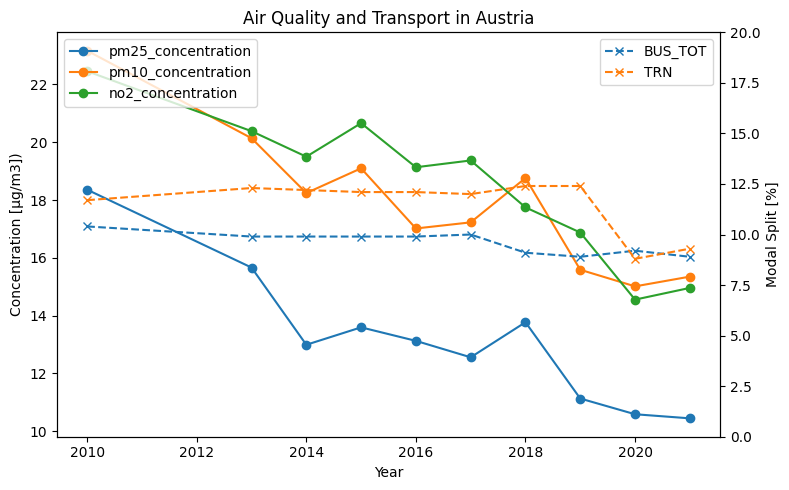

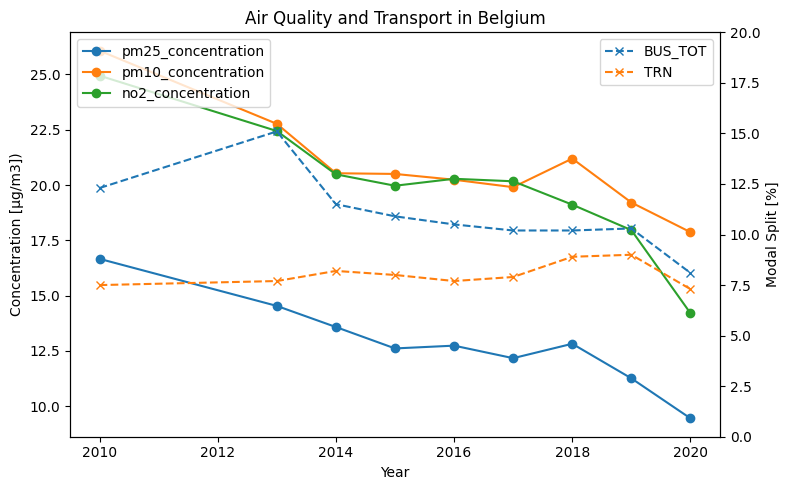

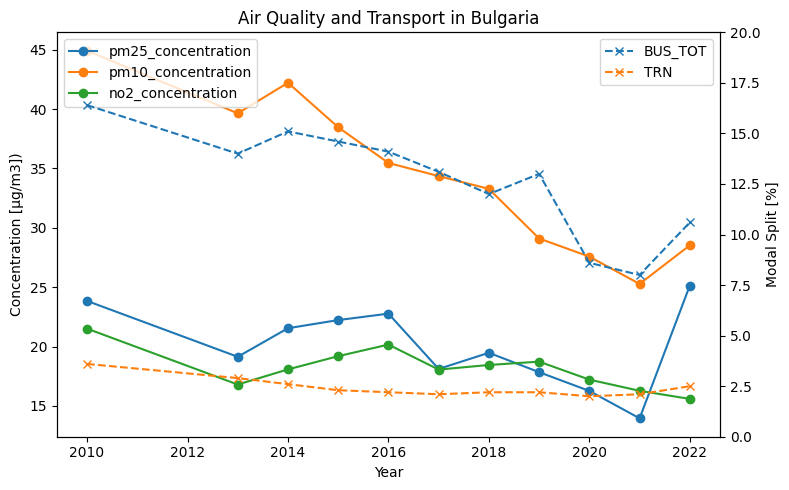

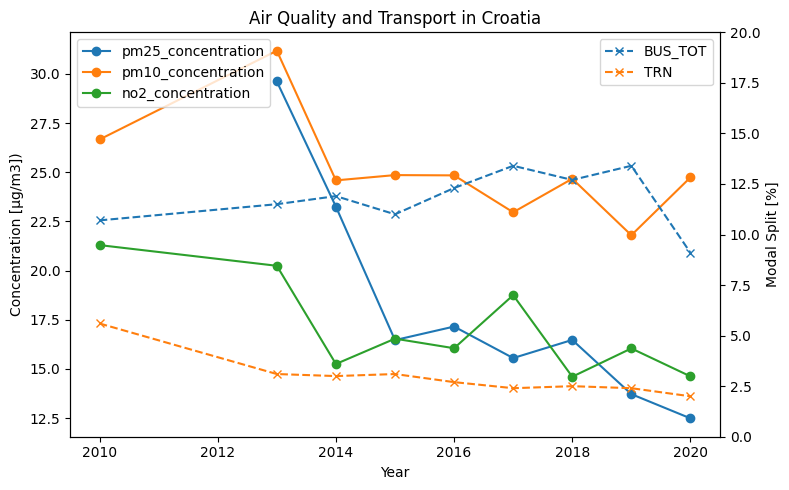

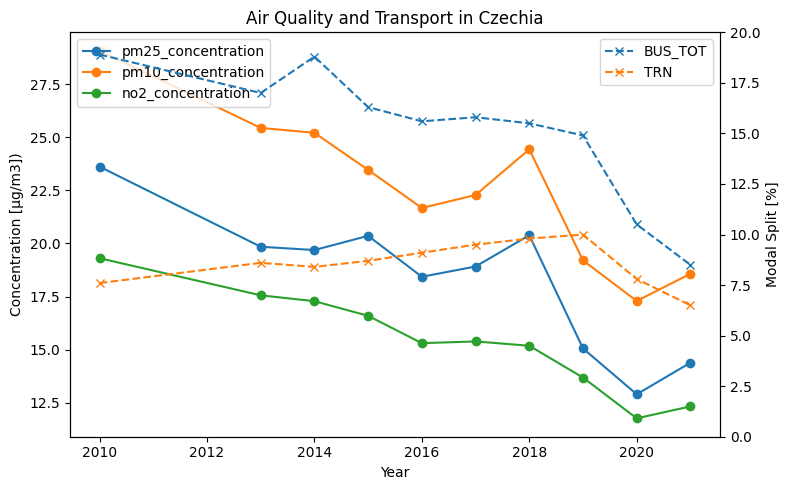

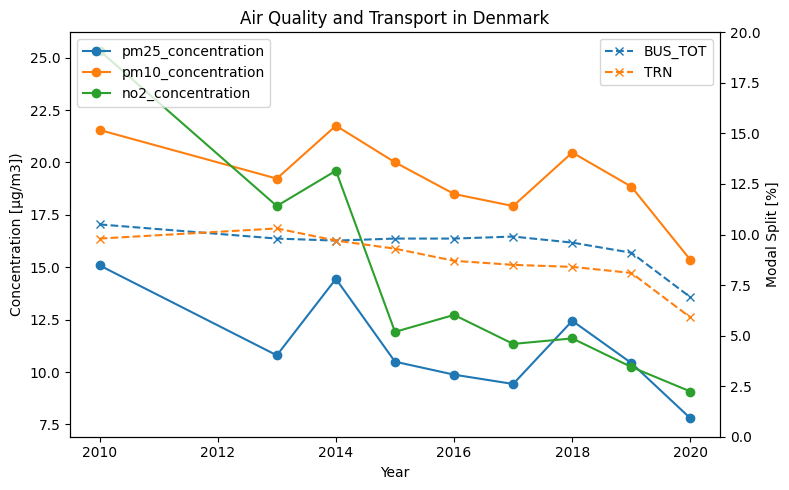

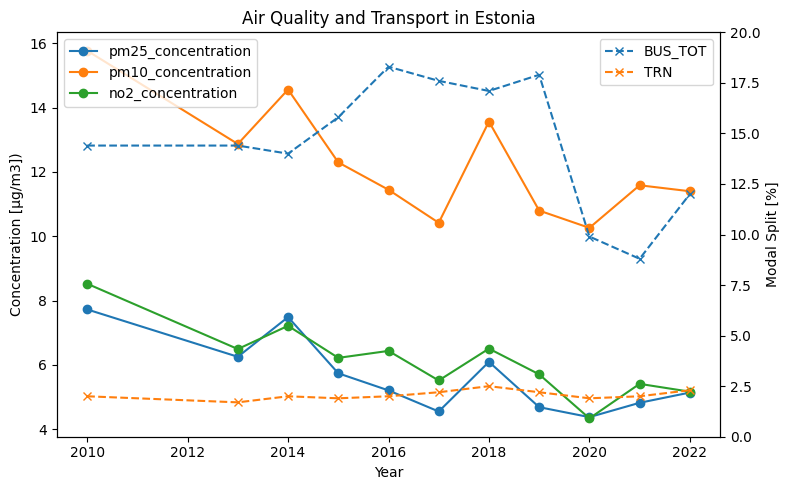

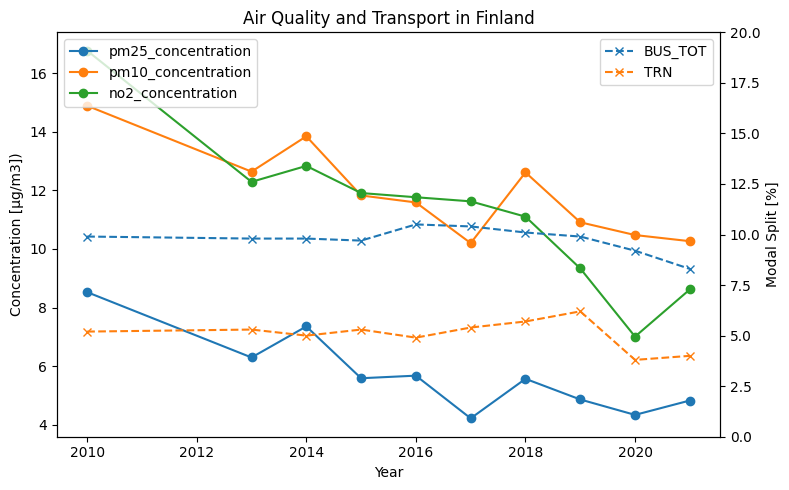

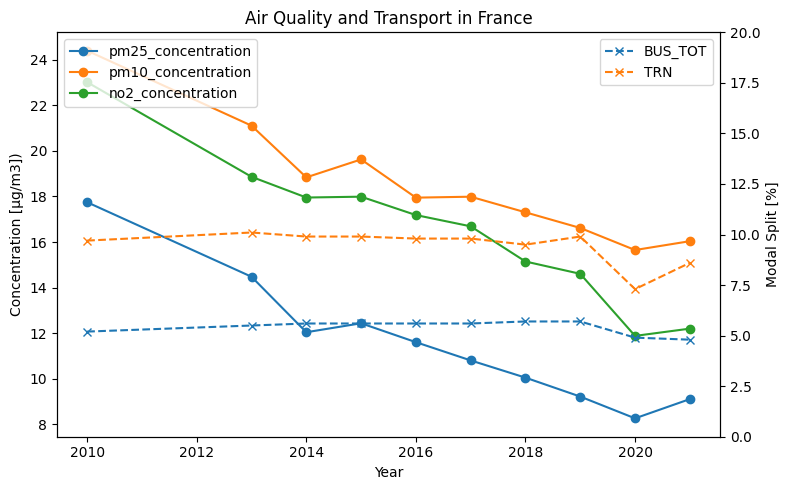

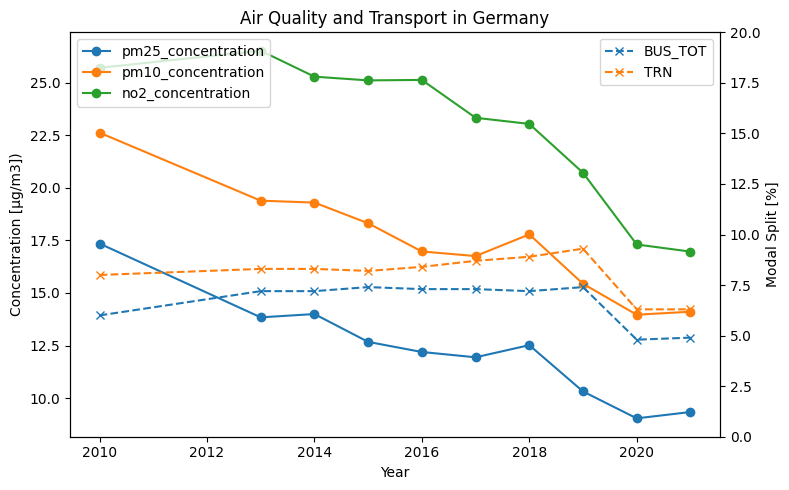

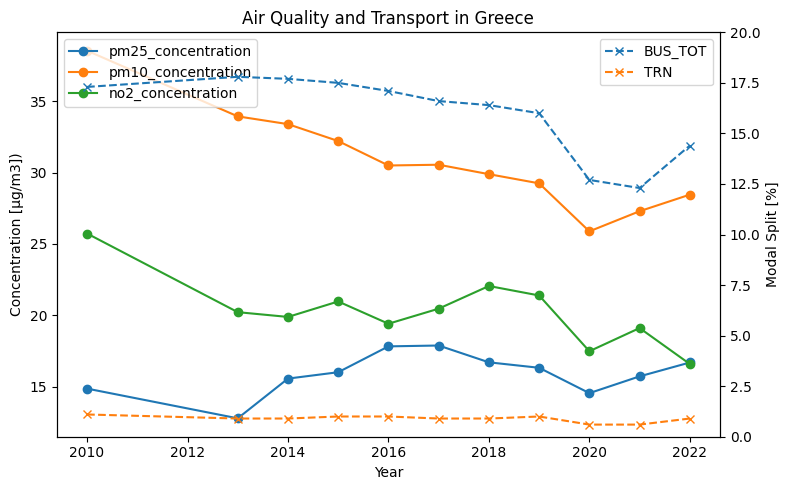

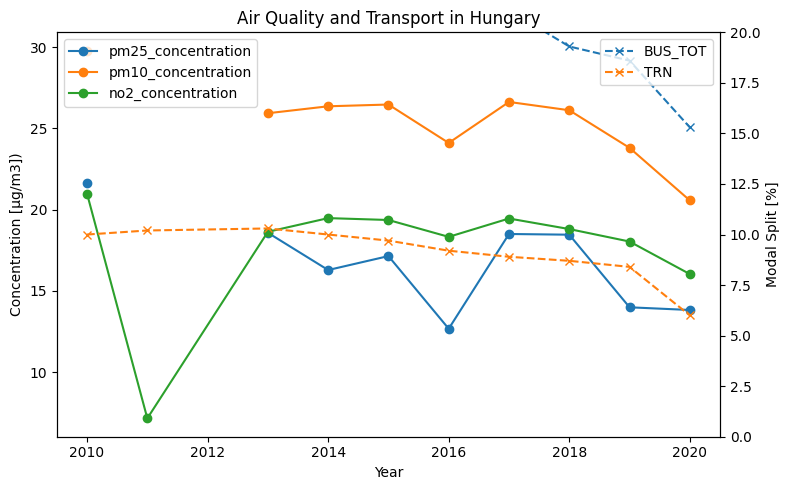

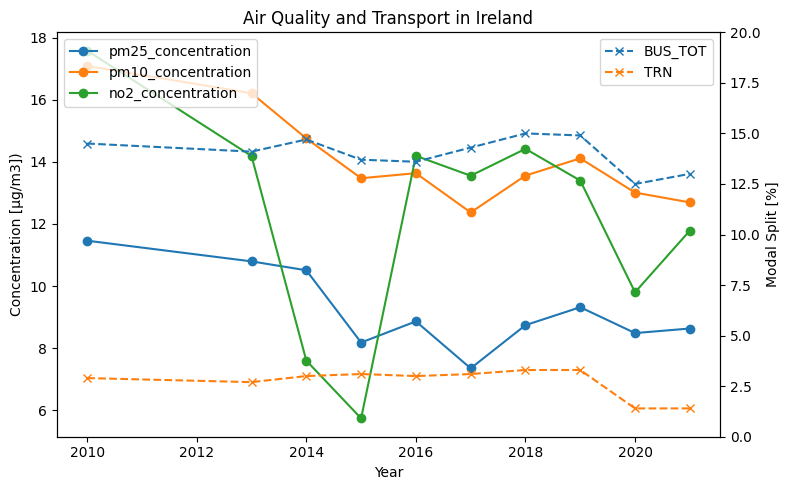

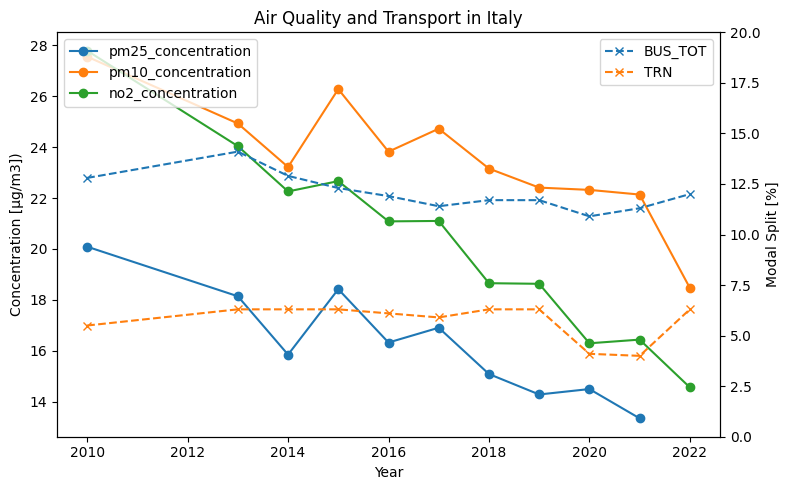

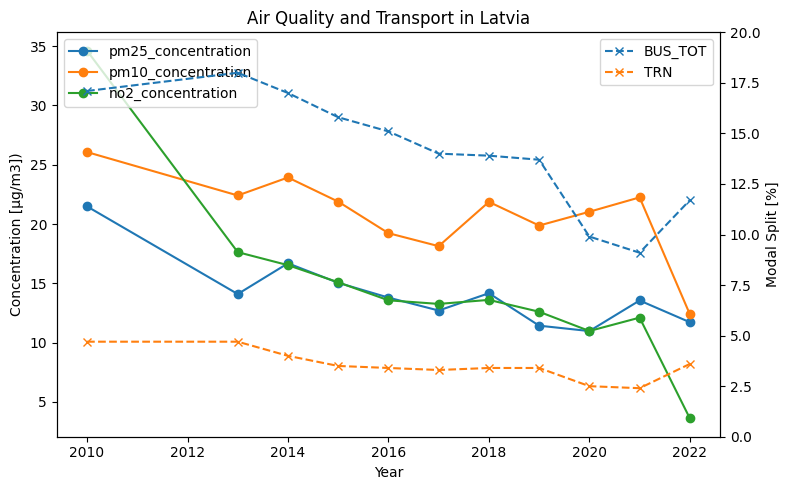

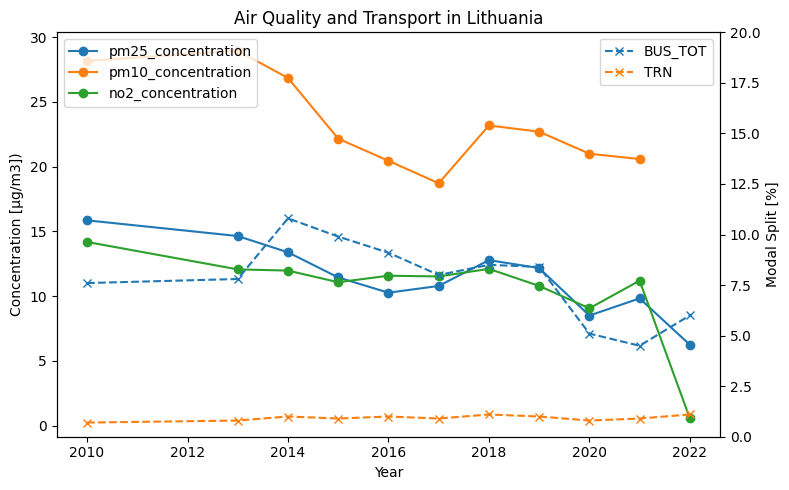

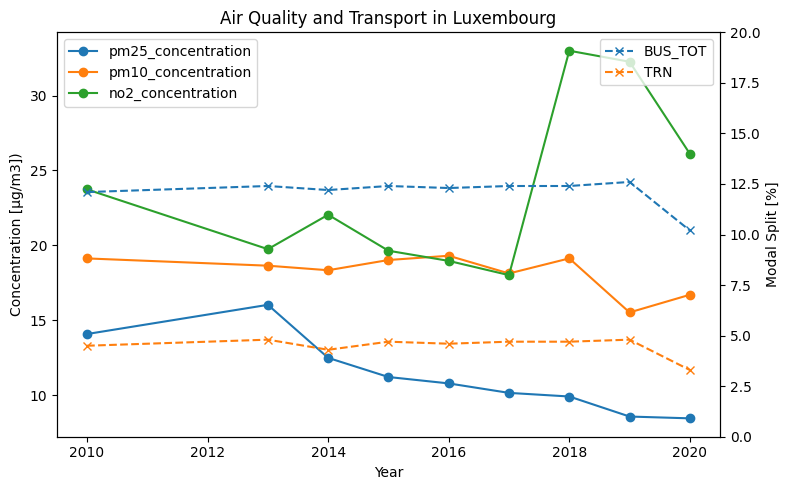

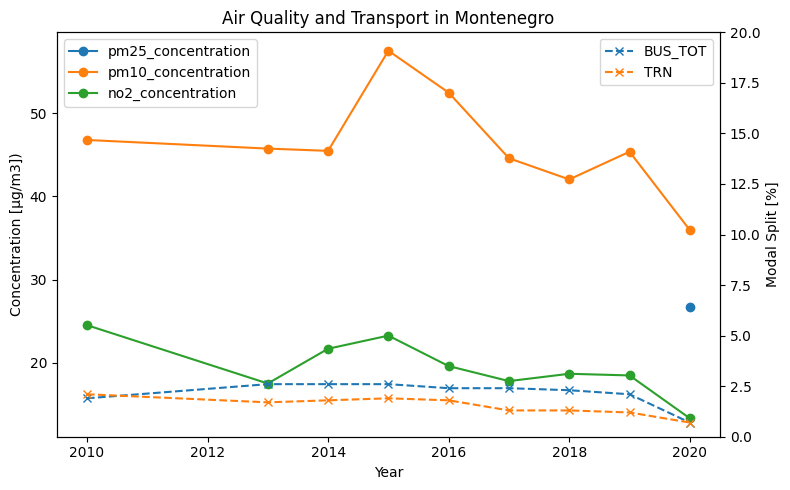

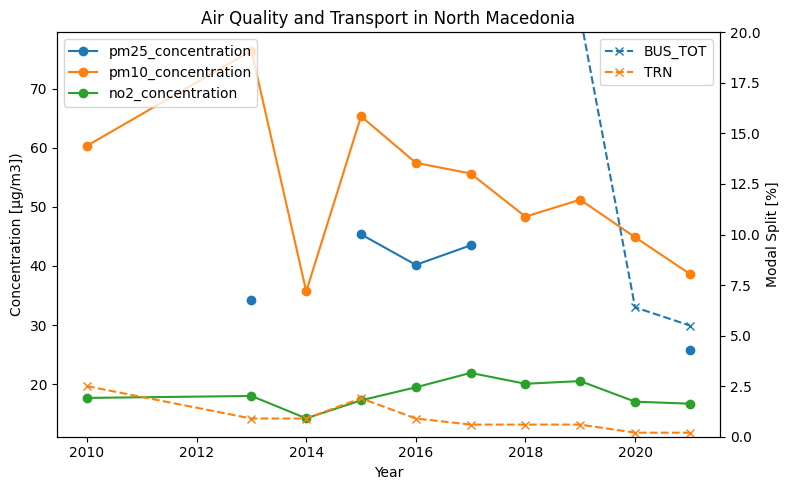

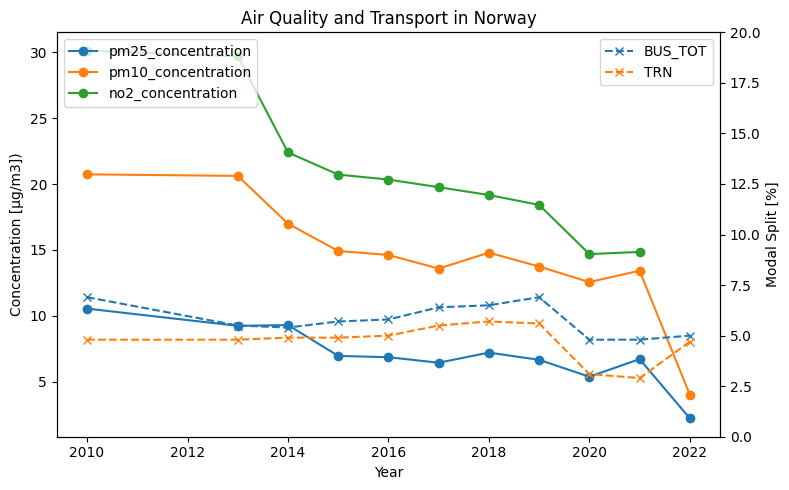

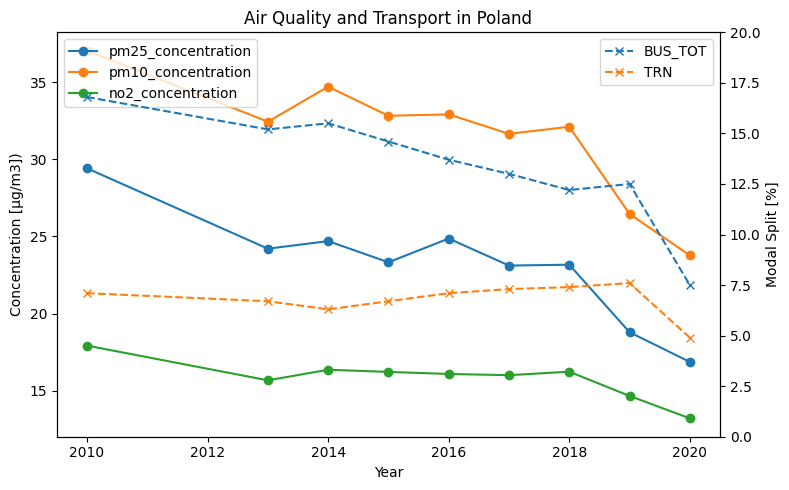

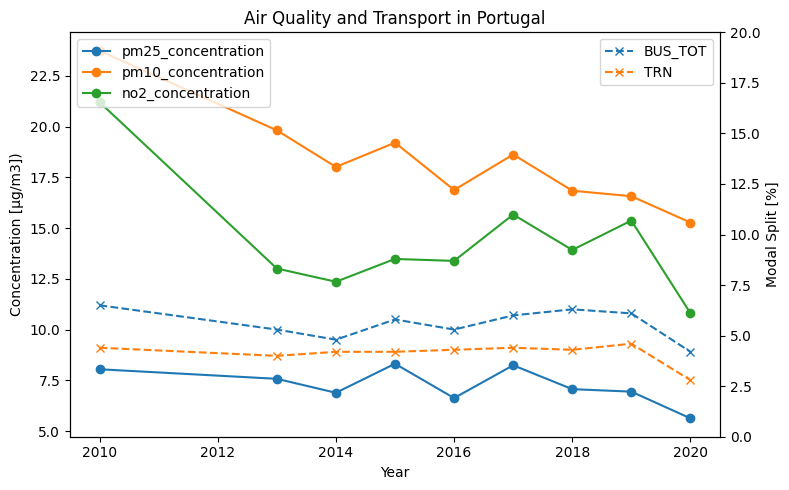

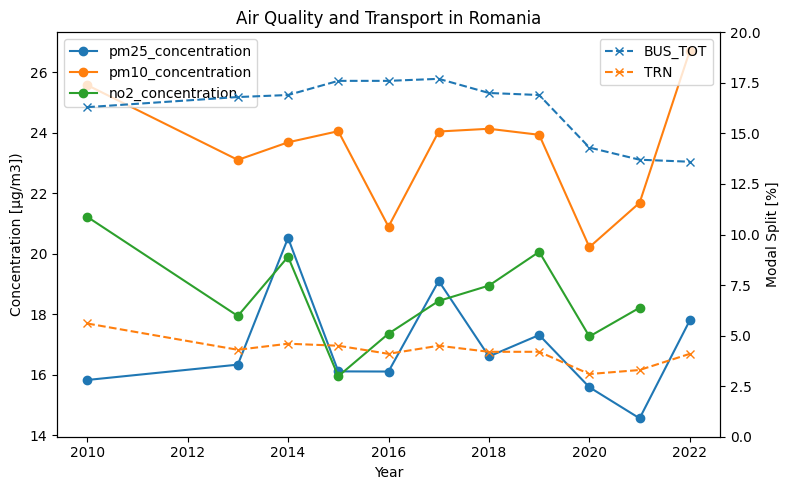

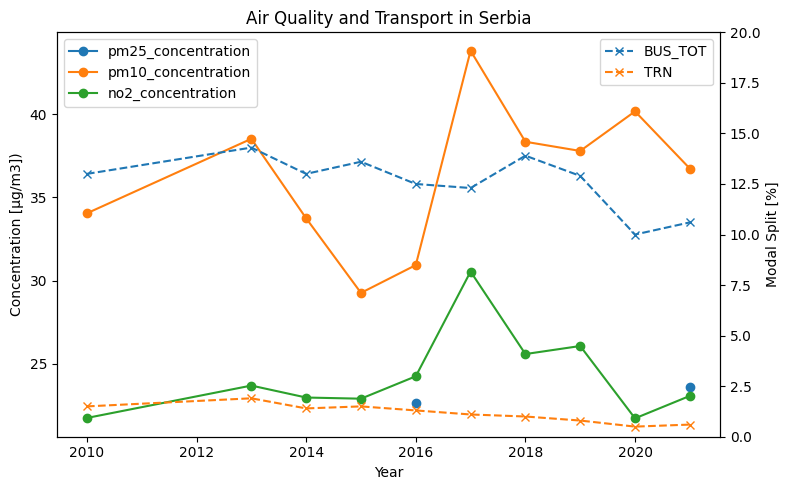

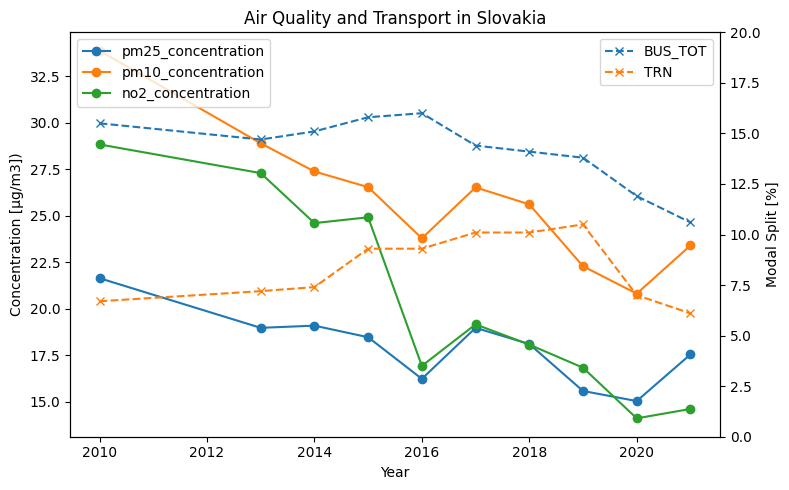

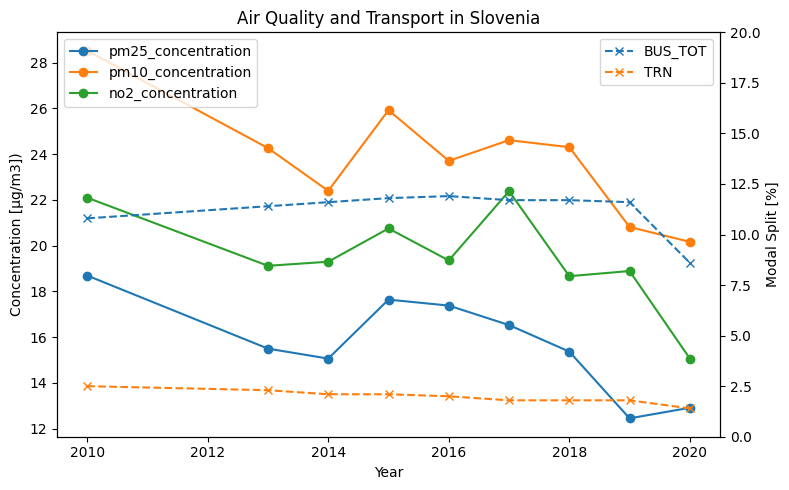

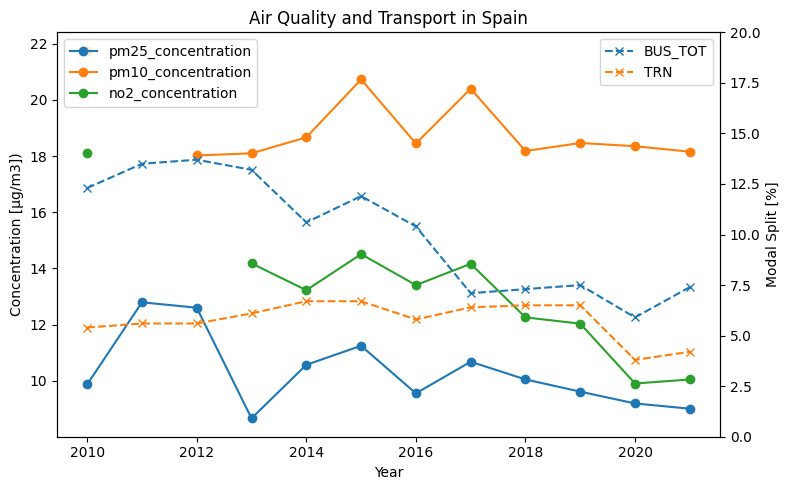

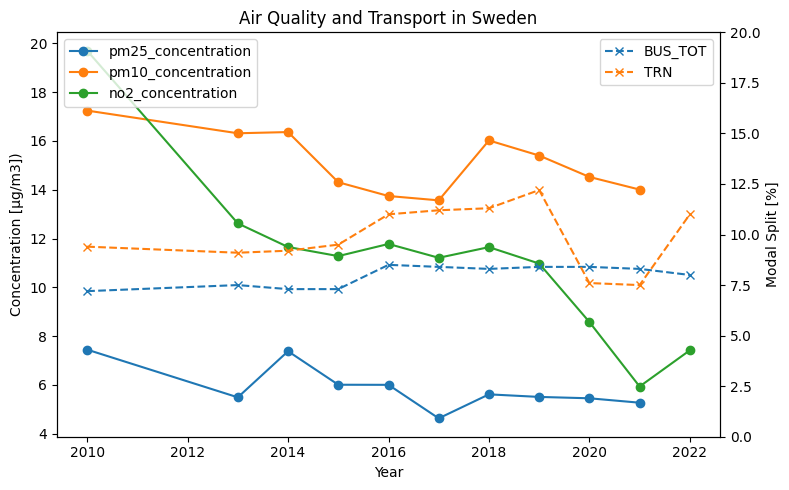

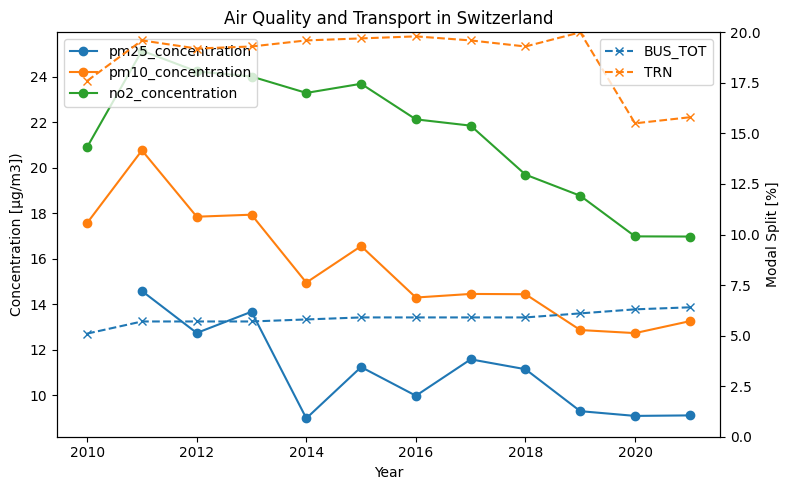

In [20]:
countries = df_plot["country_name"].unique()

for country in countries:
    country_df = df_plot[df_plot["country_name"] == country]
    fig, ax = plt.subplots(figsize=(8, 5))
    country_df.plot(
        x="year",
        y=["pm25_concentration", "pm10_concentration", "no2_concentration"],
        kind="line",
        ax=ax,
        marker="o"
    )
    ax.set_title(f"Air Quality and Transport in {country}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Concentration [μg/m3])")

    ax2 = ax.twinx()
    country_df.plot(
        x="year",
        y=["BUS_TOT", "TRN"],
        kind="line",
        ax=ax2,
        linestyle="--",
        marker="x",
        ylim=(0, 20)
    )
    ax2.set_ylabel("Modal Split [%]")

    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

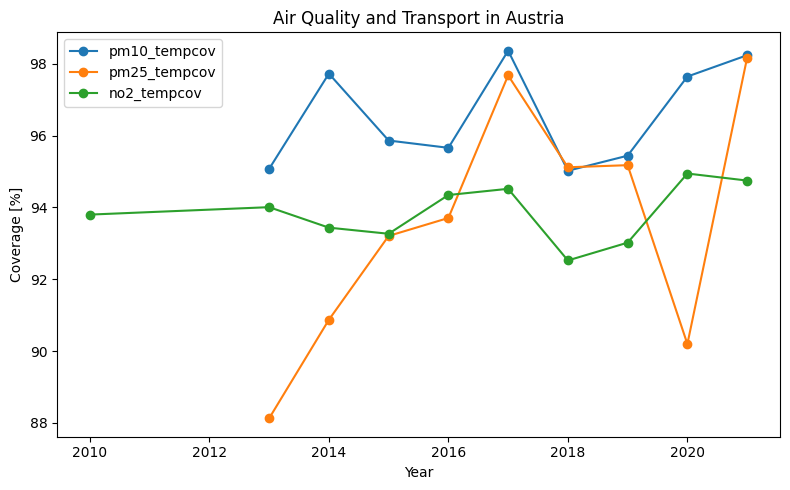

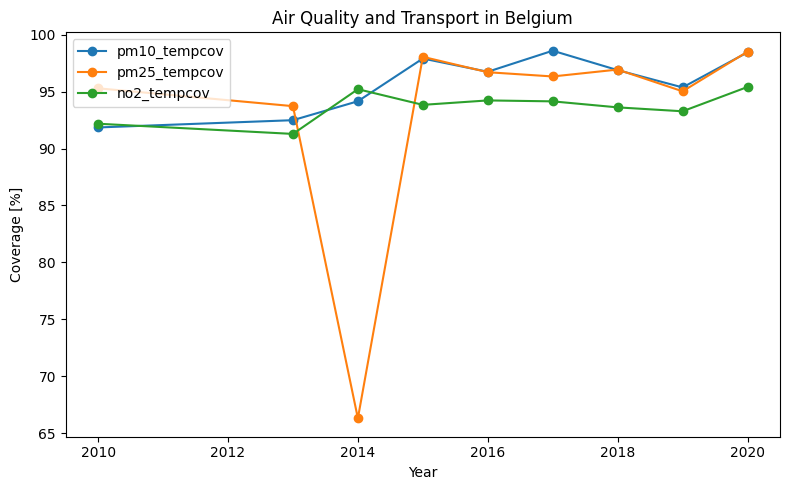

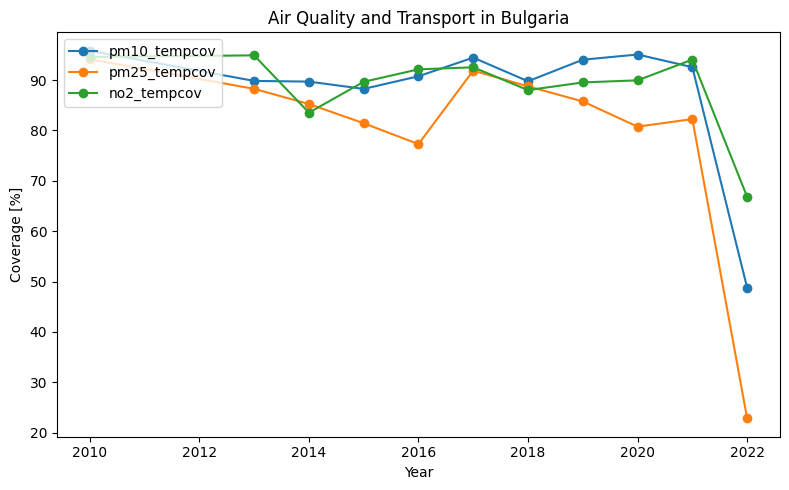

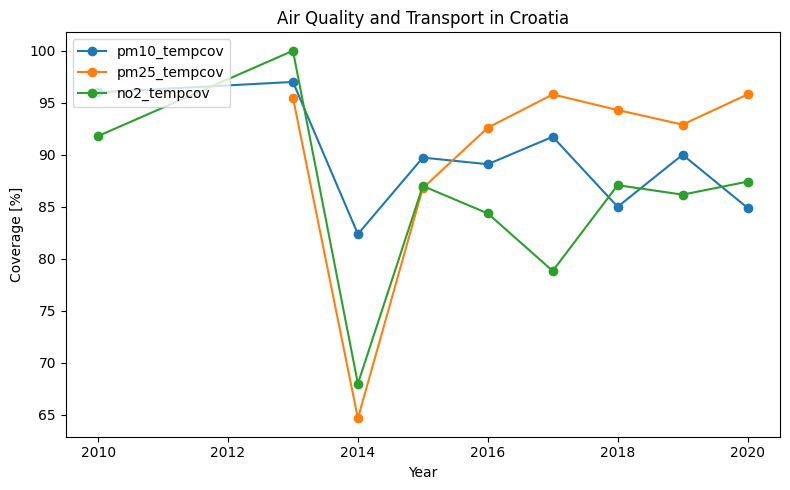

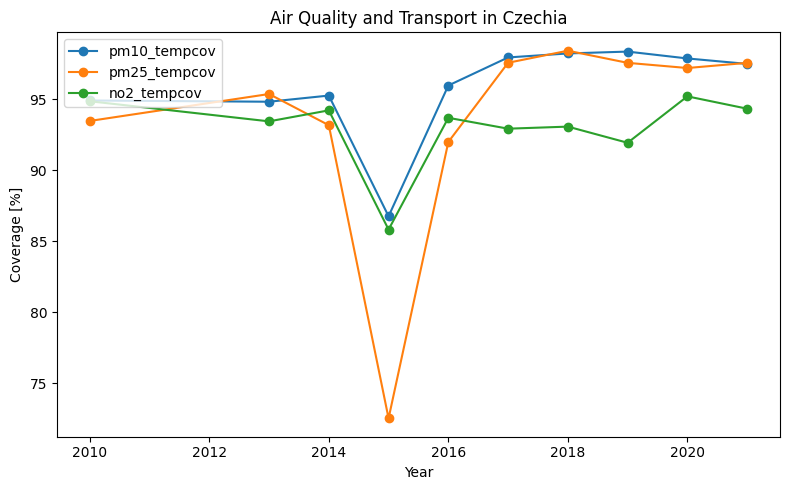

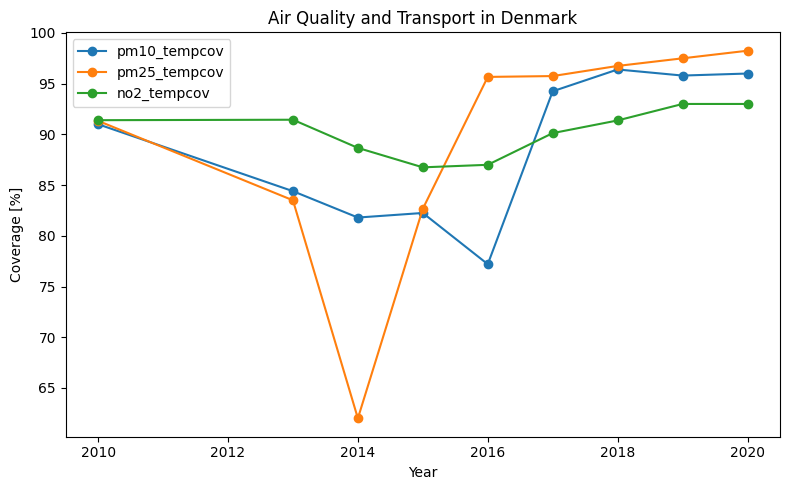

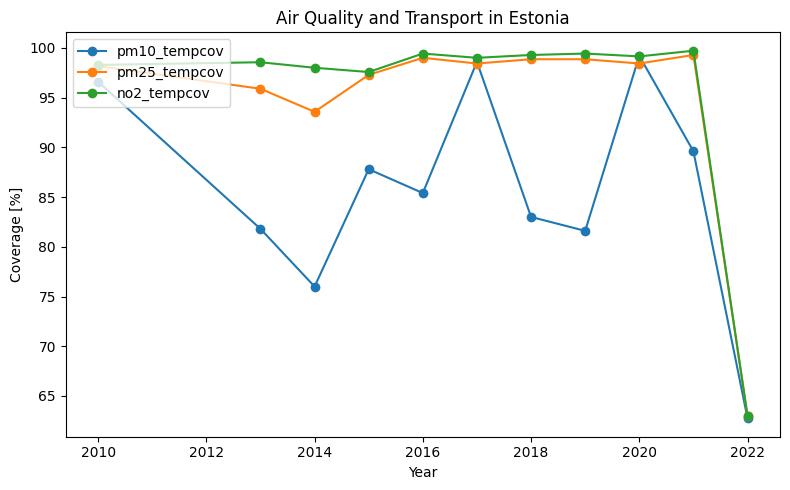

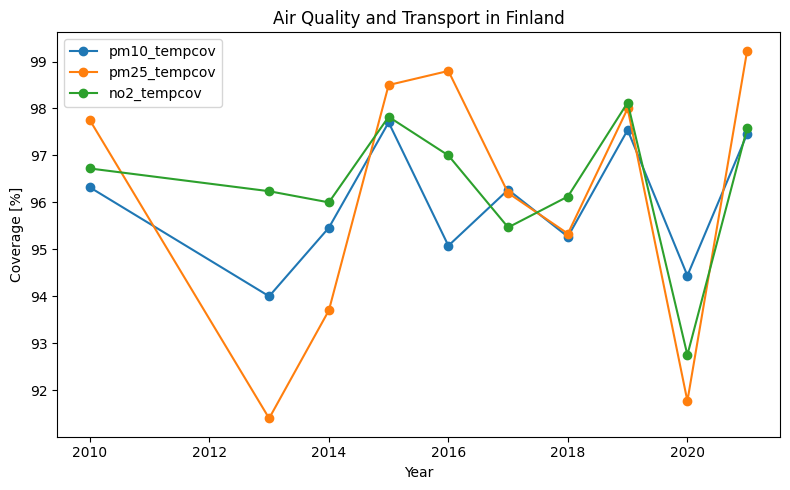

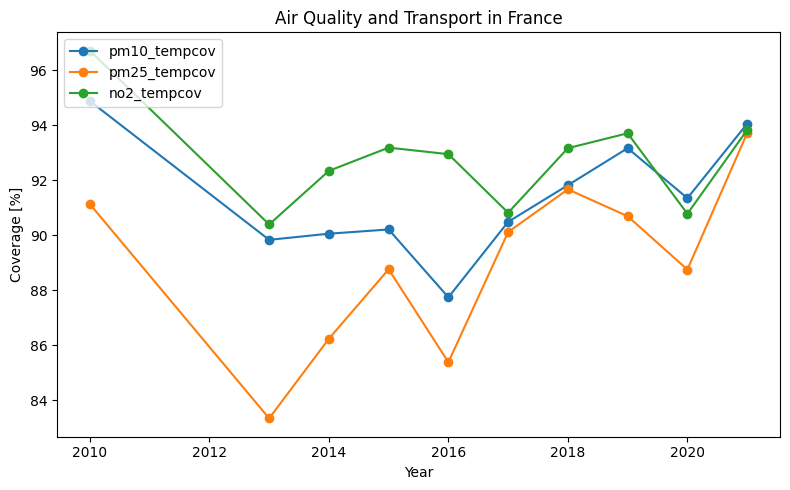

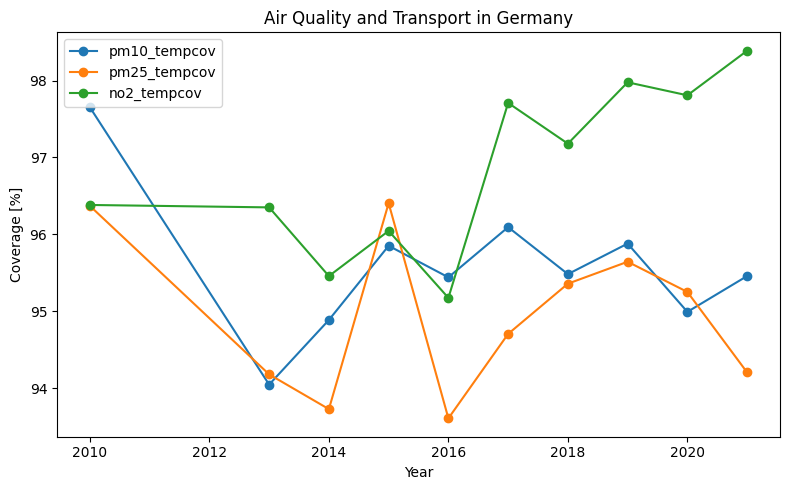

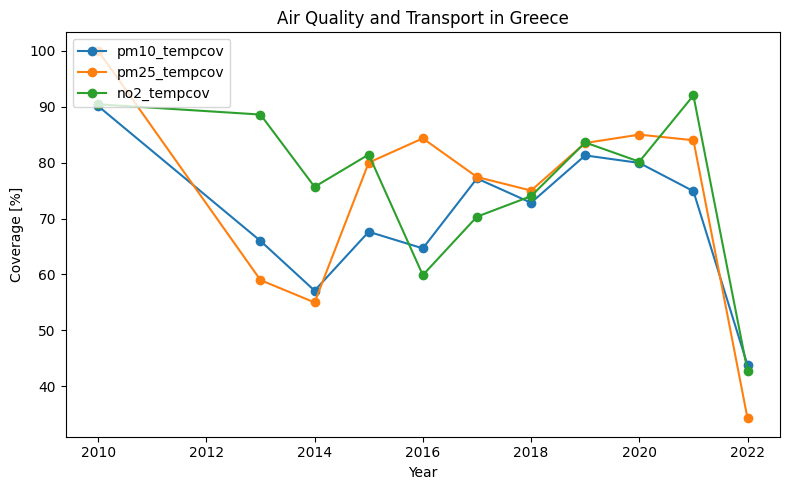

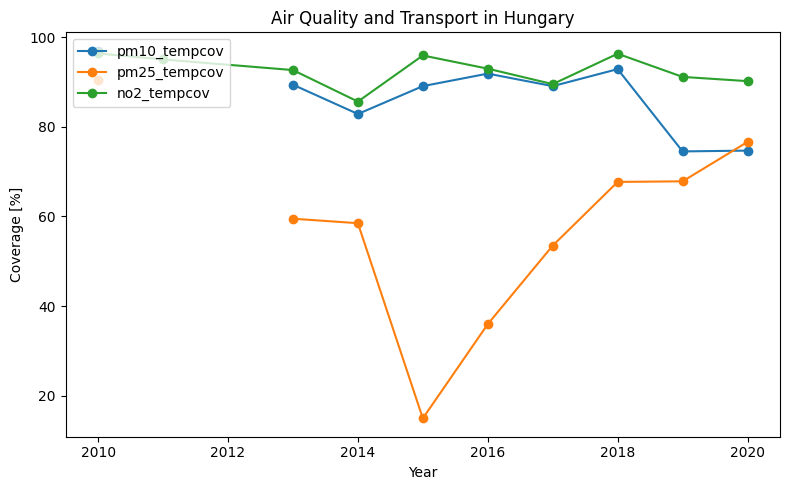

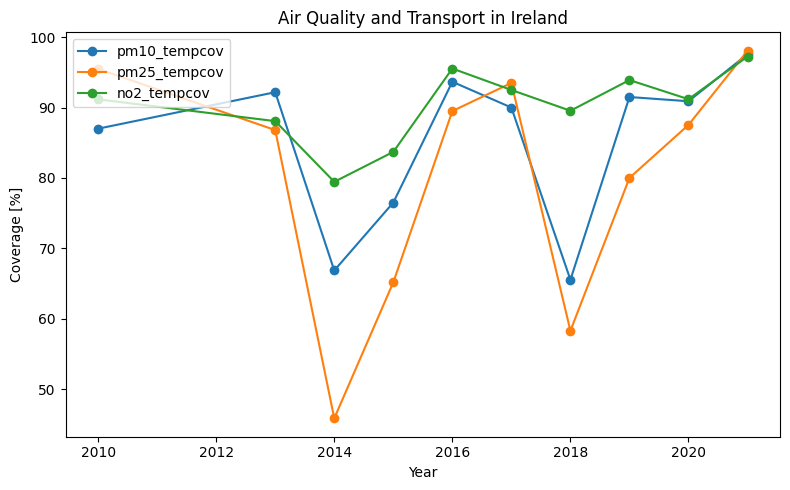

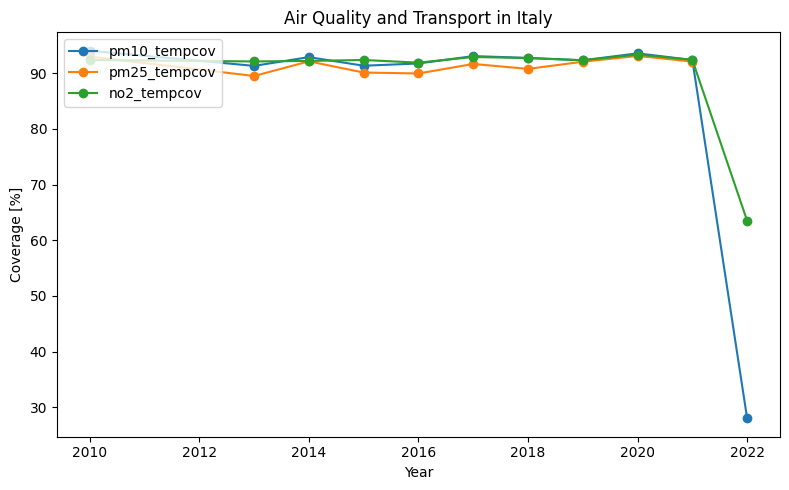

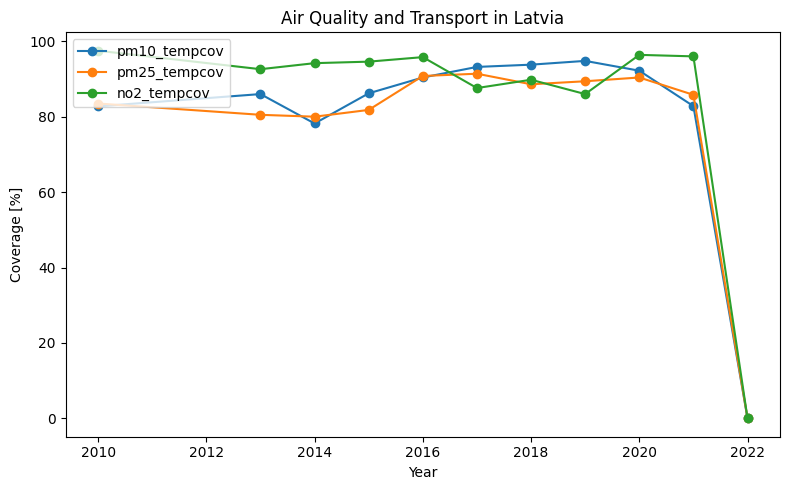

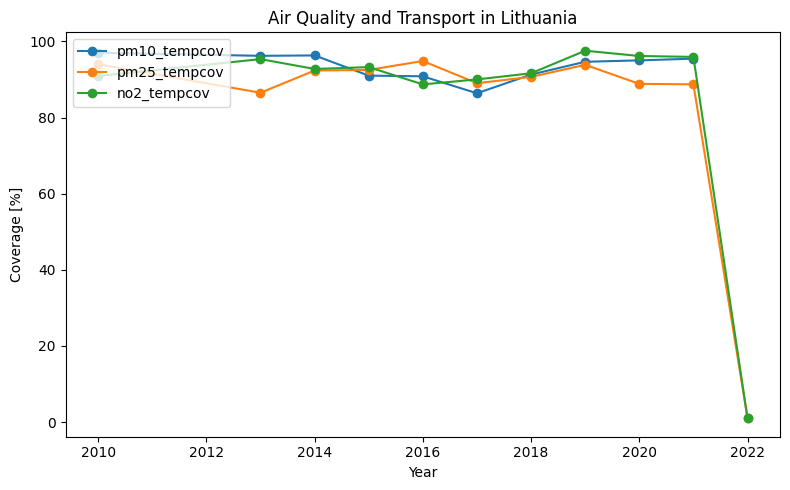

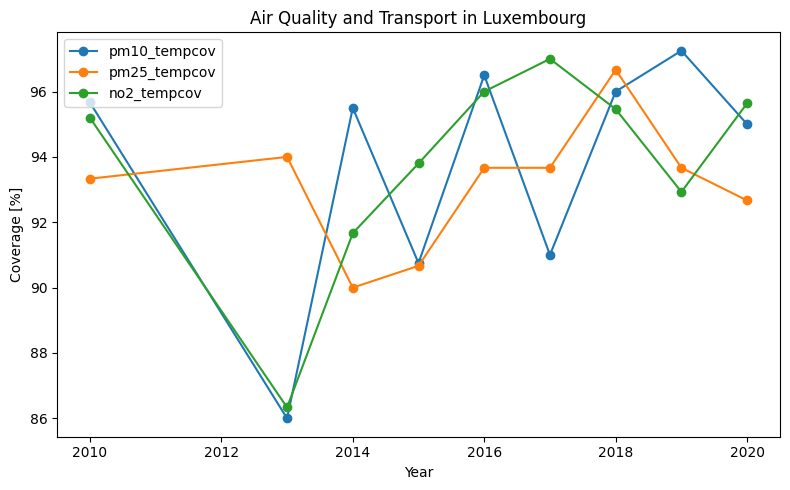

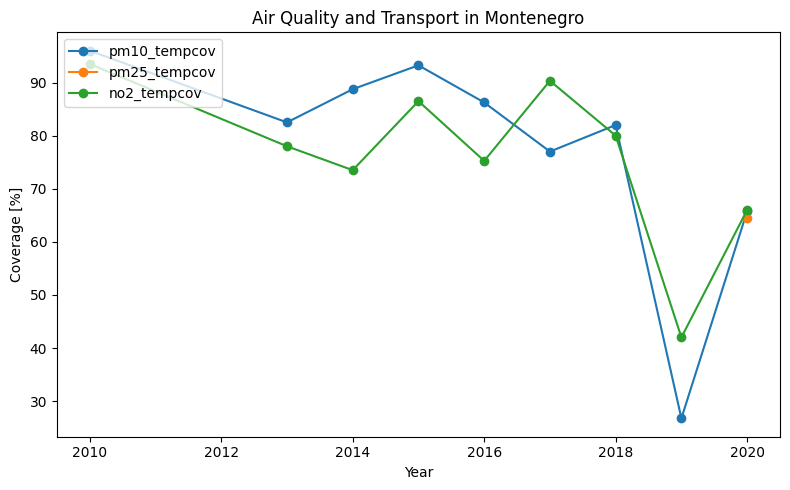

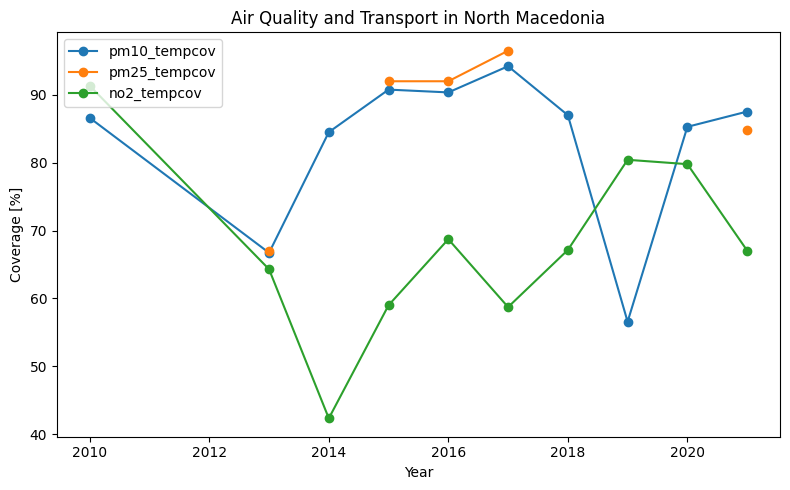

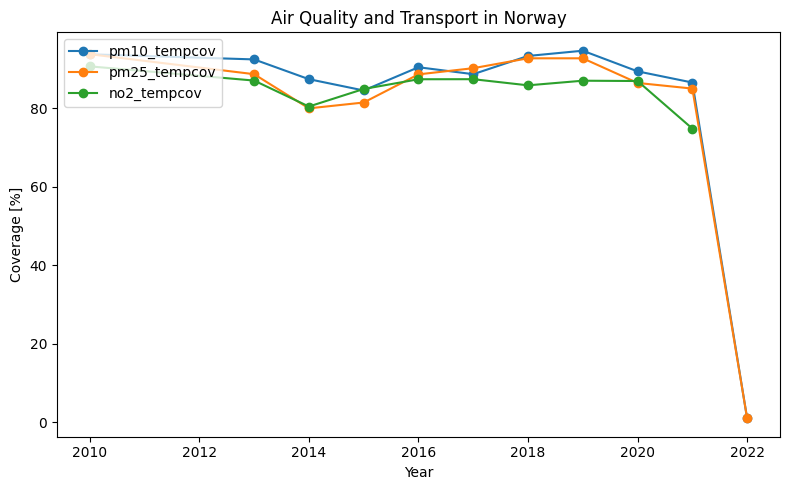

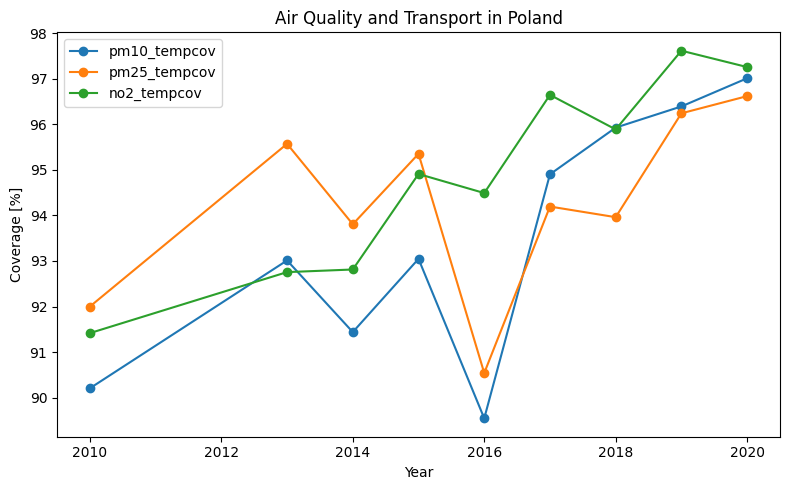

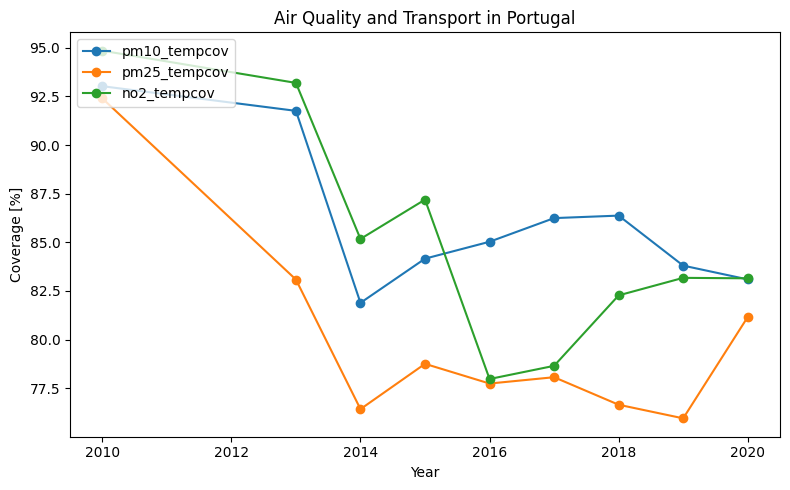

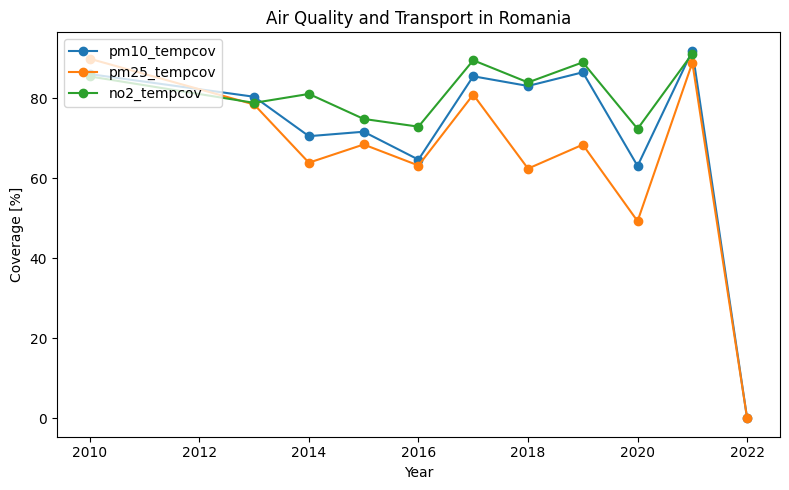

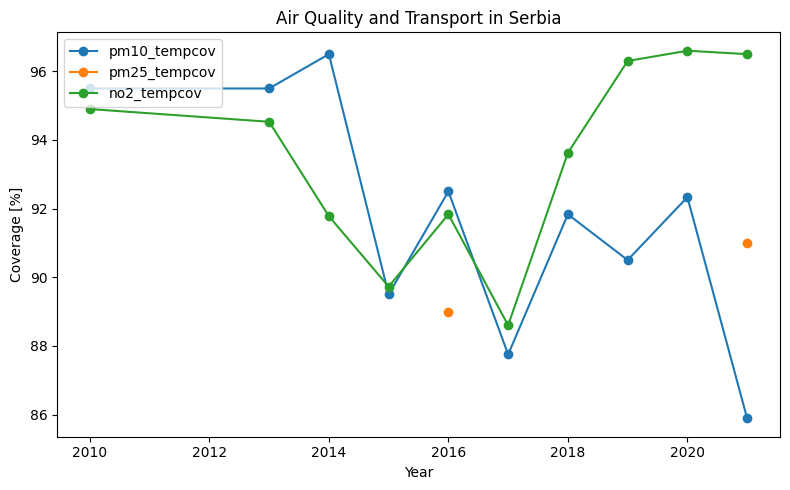

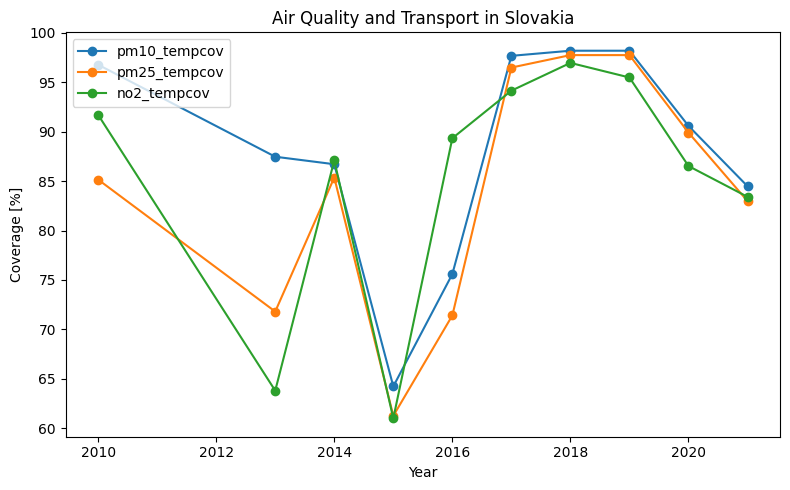

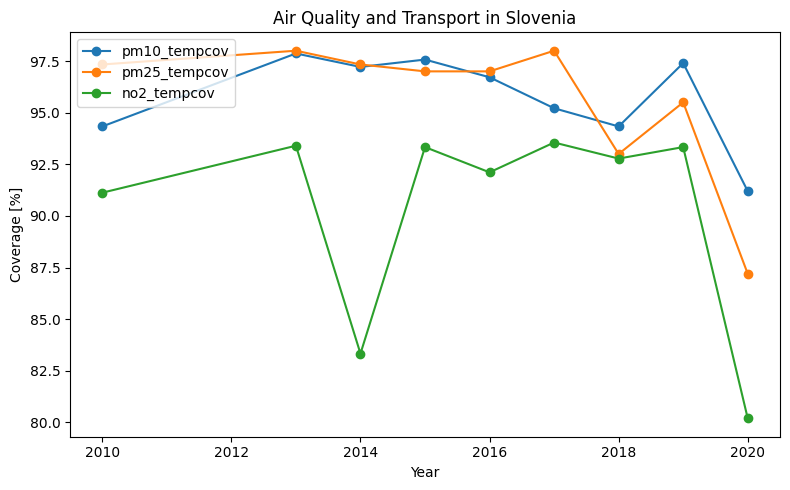

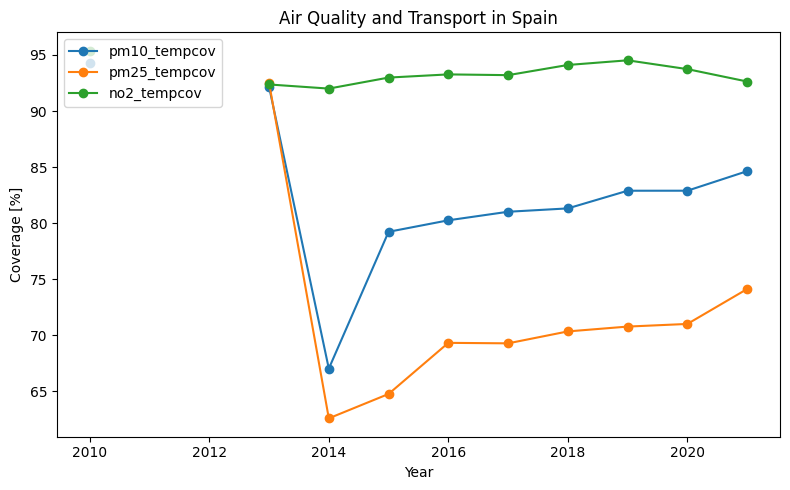

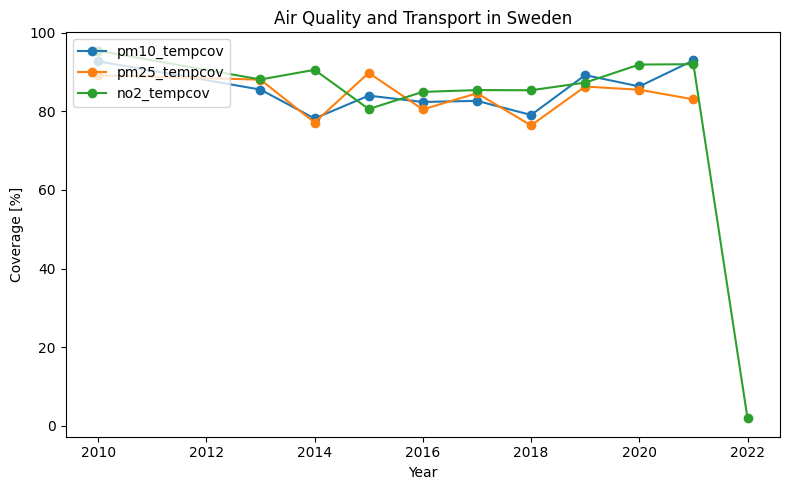

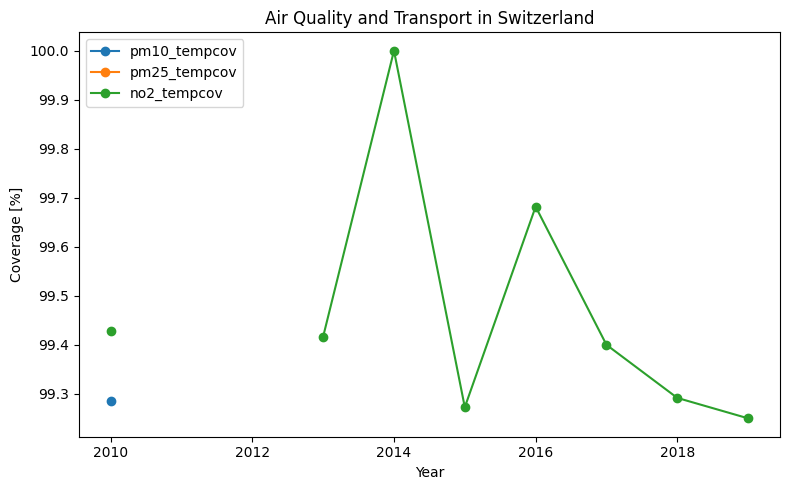

In [21]:
countries = df_plot["country_name"].unique()

for country in countries:
    country_df = df_plot[df_plot["country_name"] == country]
    fig, ax = plt.subplots(figsize=(8, 5))
    country_df.plot(
        x="year",
        y=["pm10_tempcov","pm25_tempcov", "no2_tempcov"],
        kind="line",
        ax=ax,
        marker="o"
    )
    ax.set_title(f"Air Quality and Transport in {country}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Coverage [%]")

    ax.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

In [22]:
# Select relevant columns and drop rows with missing values
cols = ["pm25_concentration", "pm10_concentration", "no2_concentration", "CAR", "BUS_TOT", "TRN"]
df_reg = df_plot[cols].dropna()

# Prepare predictors and add constant
X = df_reg[["CAR", "BUS_TOT", "TRN"]]
X = sm.add_constant(X)

results = {}
for pollutant in ["pm25_concentration", "pm10_concentration", "no2_concentration"]:
    y = df_reg[pollutant]
    model = sm.OLS(y, X).fit()
    results[pollutant] = model
    print(f"Regression results for {pollutant}:")
    print(model.summary())
    print("\n")

Regression results for pm25_concentration:
                            OLS Regression Results                            
Dep. Variable:     pm25_concentration   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     34.25
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           1.10e-18
Time:                        11:48:52   Log-Likelihood:                -814.67
No. Observations:                 264   AIC:                             1637.
Df Residuals:                     260   BIC:                             1652.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [23]:
def plot_pollutant_vs_transport(df, pollutant):
    transports = ["CAR", "BUS_TOT", "TRN"]
    fig, axes = plt.subplots(1, len(transports), figsize=(15, 4), sharey=True)
    corrs = {}

    for i, transport in enumerate(transports):
        mask = ~df[transport].isna() & ~df[pollutant].isna()
        sc = axes[i].scatter(df[transport][mask], df[pollutant][mask], c=df["year"][mask], cmap="viridis", alpha=0.6)
        coef = polyfit(df[transport][mask], df[pollutant][mask], 1)
        x = np.linspace(df[transport].min(), df[transport].max(), 100)
        axes[i].plot(x, polyval(coef, x), color="red", label="Regression line")
        axes[i].set_xlabel(transport)
        axes[i].set_title(f"{transport} vs {pollutant.upper()}")
        axes[i].legend()
        corr = df[transport][mask].corr(df[pollutant][mask])
        corrs[transport] = corr

    # cbar = plt.colorbar(sc, ax=axes, orientation="horizontal", pad=0.2)
    # cbar.set_label("Year", labelpad=15, loc="left")
    plt.tight_layout()
    plt.show()
    return corrs



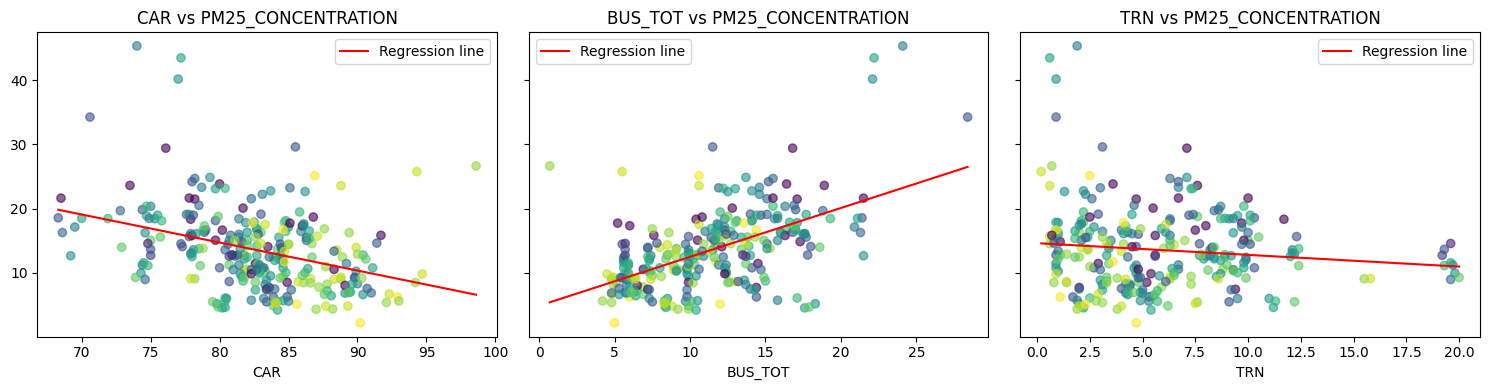

{'CAR': np.float64(-0.3630377317022225),
 'BUS_TOT': np.float64(0.5381820349180836),
 'TRN': np.float64(-0.12003575247192261)}

In [24]:
plot_pollutant_vs_transport(df_plot, "pm25_concentration")

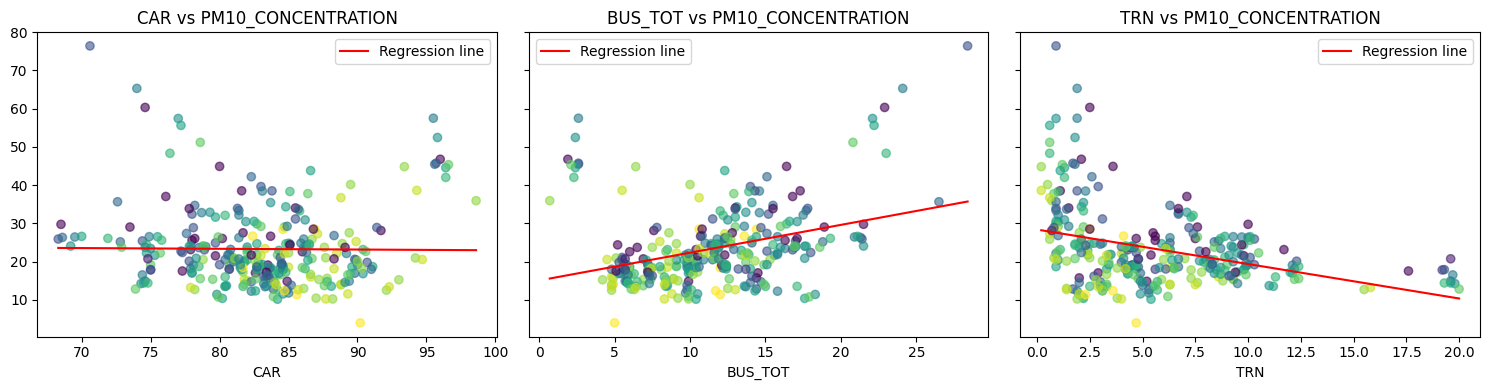

{'CAR': np.float64(-0.010586848973687793),
 'BUS_TOT': np.float64(0.3419132955964044),
 'TRN': np.float64(-0.3741086755823363)}

In [25]:
plot_pollutant_vs_transport(df_plot, "pm10_concentration")

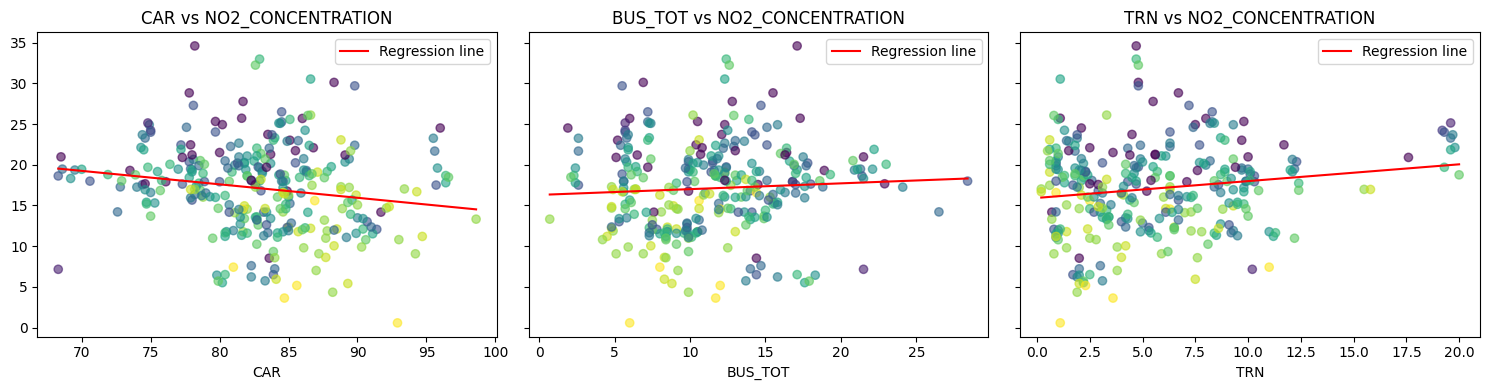

{'CAR': np.float64(-0.17156248439982089),
 'BUS_TOT': np.float64(0.062359551397647664),
 'TRN': np.float64(0.15977517231444138)}

In [26]:
plot_pollutant_vs_transport(df_plot, "no2_concentration")

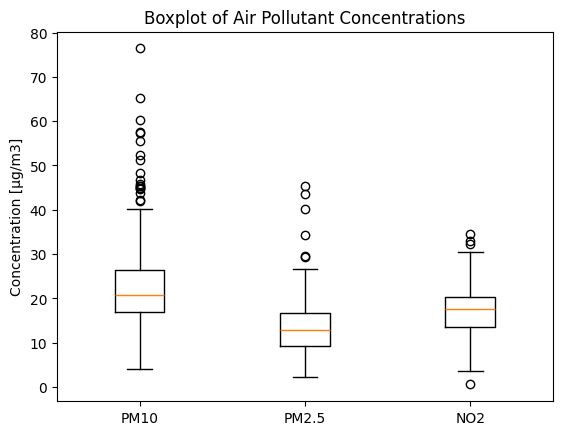

In [27]:
plt.boxplot([
    df_plot["pm10_concentration"].dropna(),
    df_plot["pm25_concentration"].dropna(),
    df_plot["no2_concentration"].dropna()
])
plt.xticks([1, 2, 3], ["PM10", "PM2.5", "NO2"])
plt.ylabel("Concentration [μg/m3]")
plt.title("Boxplot of Air Pollutant Concentrations")
plt.show()

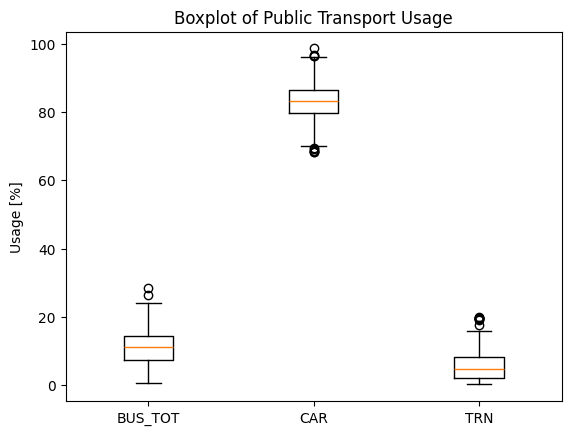

In [28]:
plt.boxplot([
    df_plot["BUS_TOT"],
    df_plot["CAR"],
    df_plot["TRN"]
])
plt.xticks([1, 2, 3], ["BUS_TOT", "CAR", "TRN"])
plt.ylabel("Usage [%]")
plt.title("Boxplot of Public Transport Usage")
plt.show()